In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys


In [3]:
%load_ext IPython.extensions.autoreload
%autoreload 2

# In a terminal, run these
#   export PYTHONPATH=/home/patrice/work/ppsp/pywt:$PYTHONPATH
#   export PYTHONPATH=/home/patrice/work/ppsp/pycwt:$PYTHONPATH
# Then open code from the terminal
# 
# Or, use this (but vscode will not be able to resolve the import)
# sys.path.insert(0, '/home/patrice/work/ppsp/pywt')
# sys.path.insert(0, '/home/patrice/work/ppsp/pycwt')

import pywt  # the library we want to use
import pycwt # the library we don't want to use (hardcoded stuff, no tests)

import hypyp



ninja: error: '/tmp/pip-build-env-tiw5qk87/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


Loading pwt from /home/patrice/work/ppsp/pywt/pywt


In [4]:
wavelet = pywt.ContinuousWavelet('cmor0.5, 1.0')
print(wavelet)


ContinuousWavelet cmor0.5, 1.0
  Family name:    Complex Morlet wavelets
  Short name:     cmor
  Symmetry:       asymmetric
  DWT:            False
  CWT:            True
  Complex CWT:    True


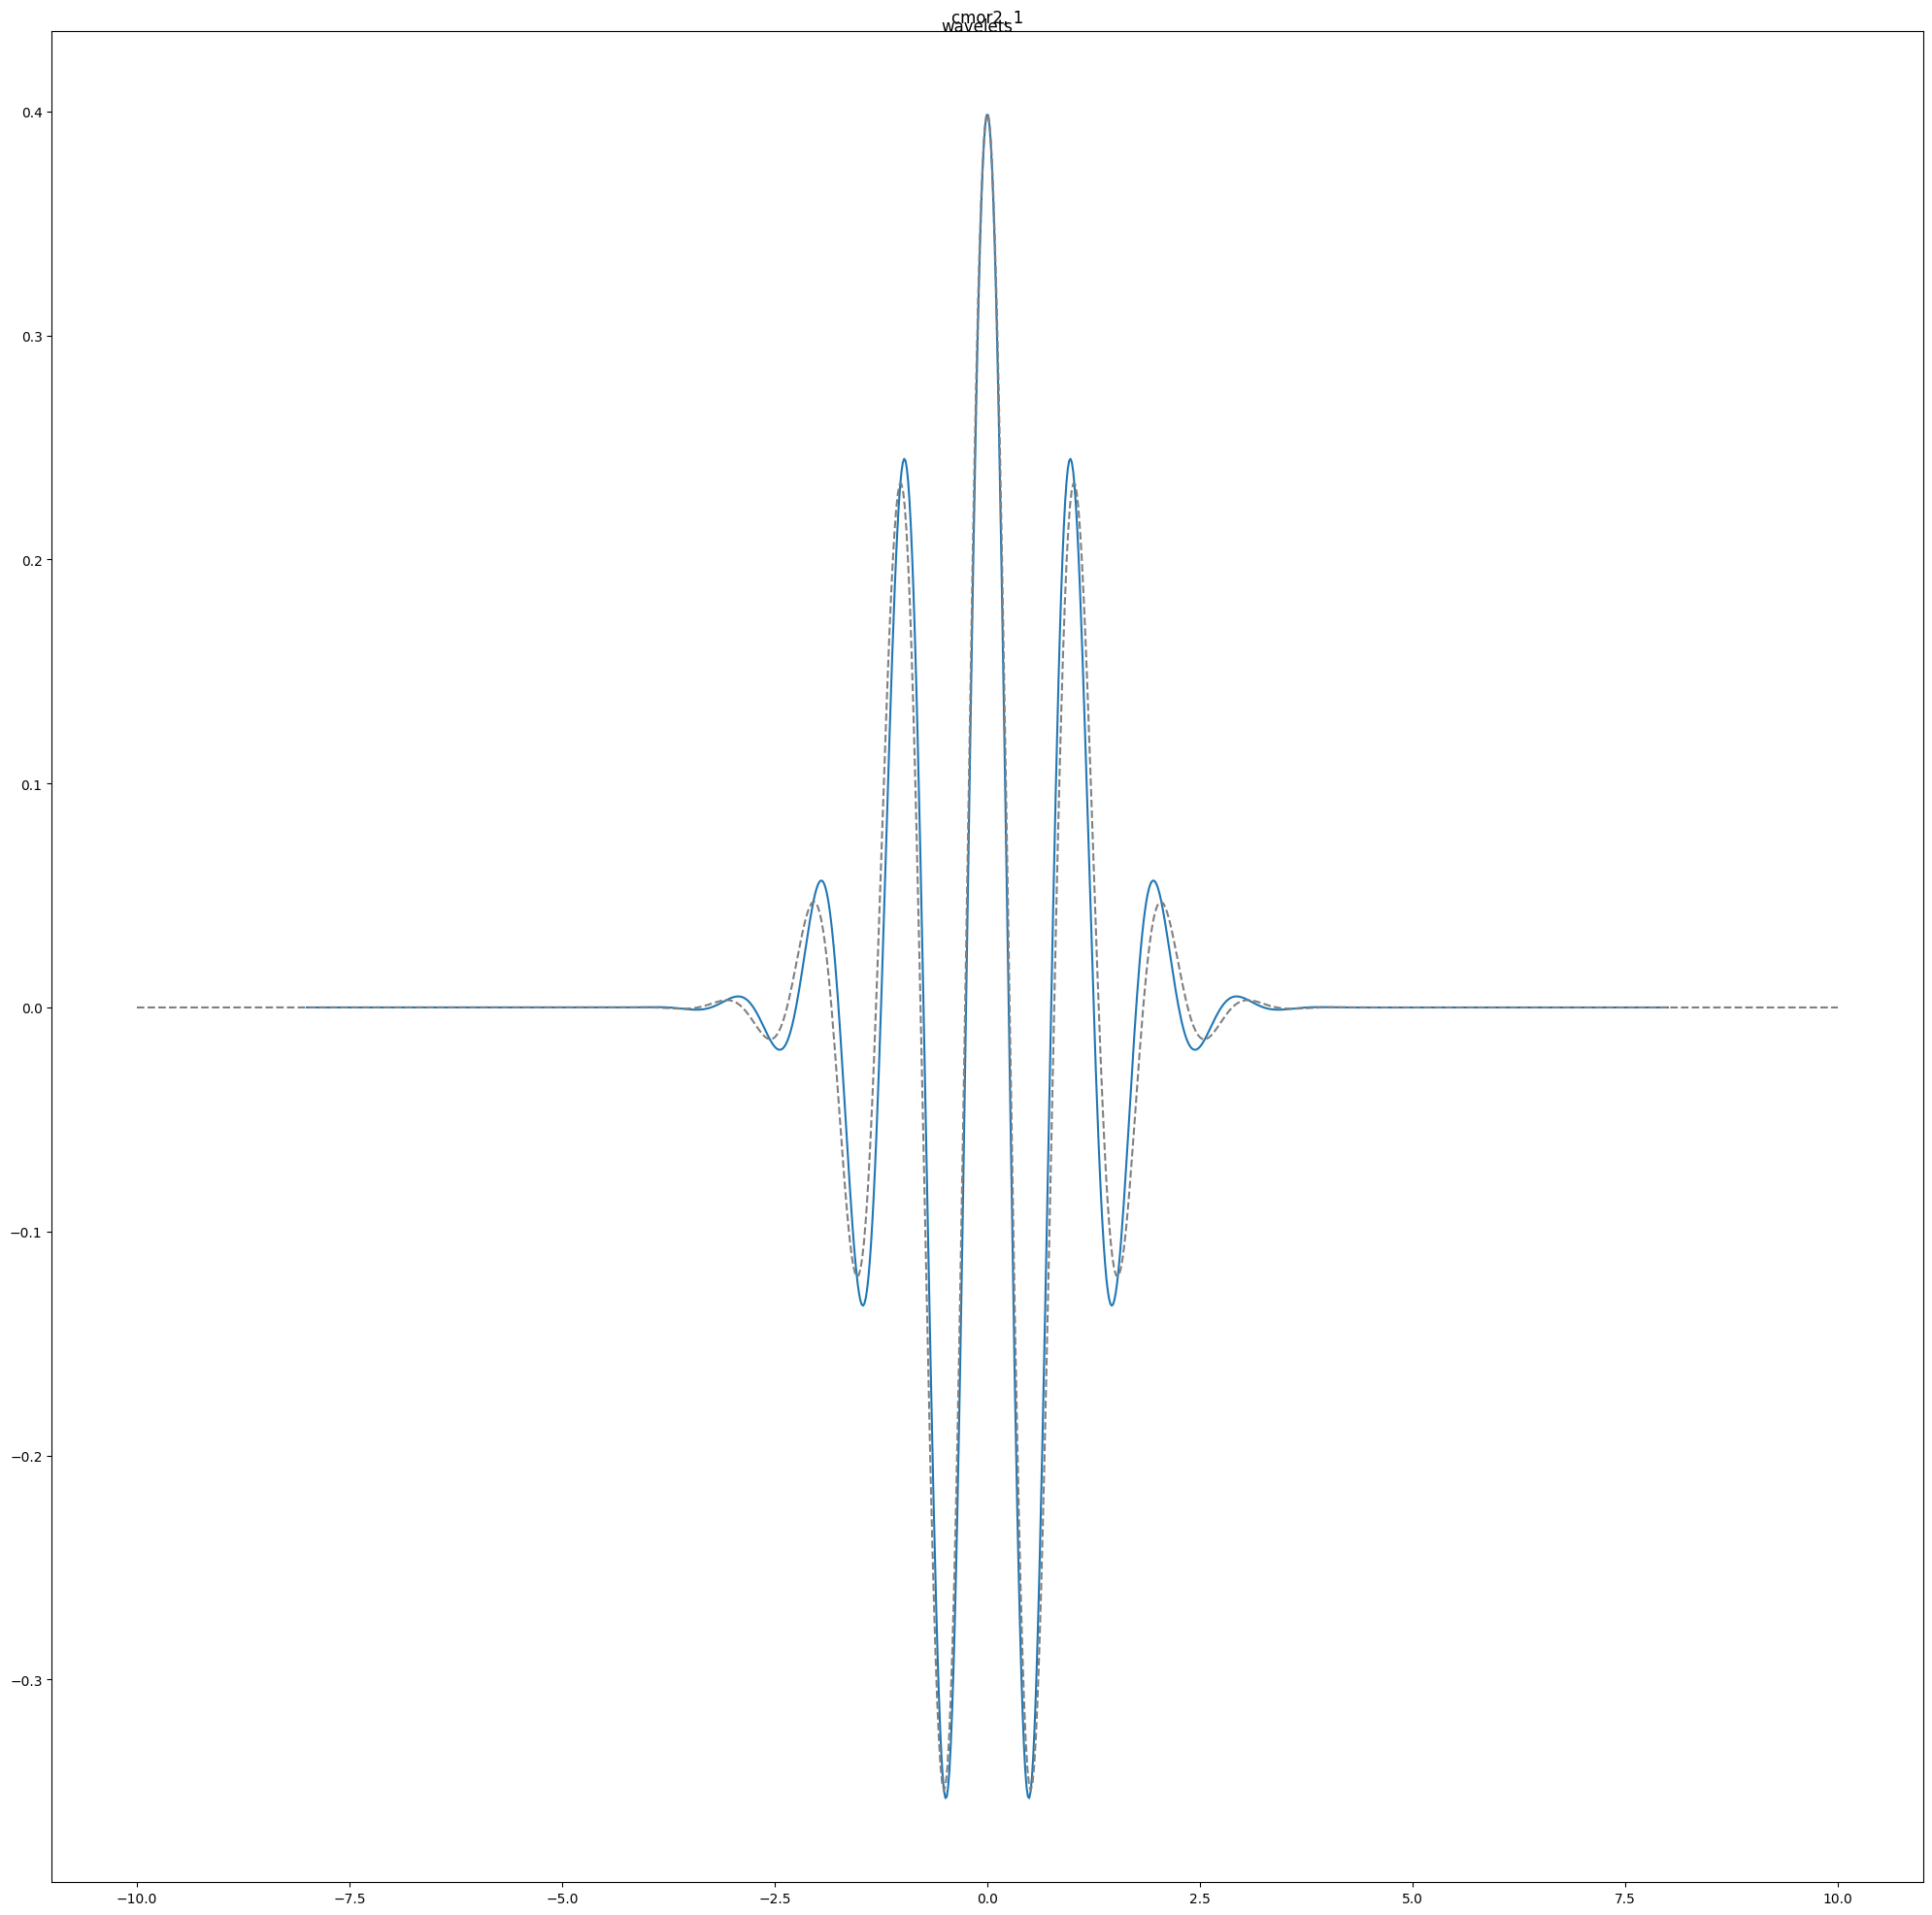

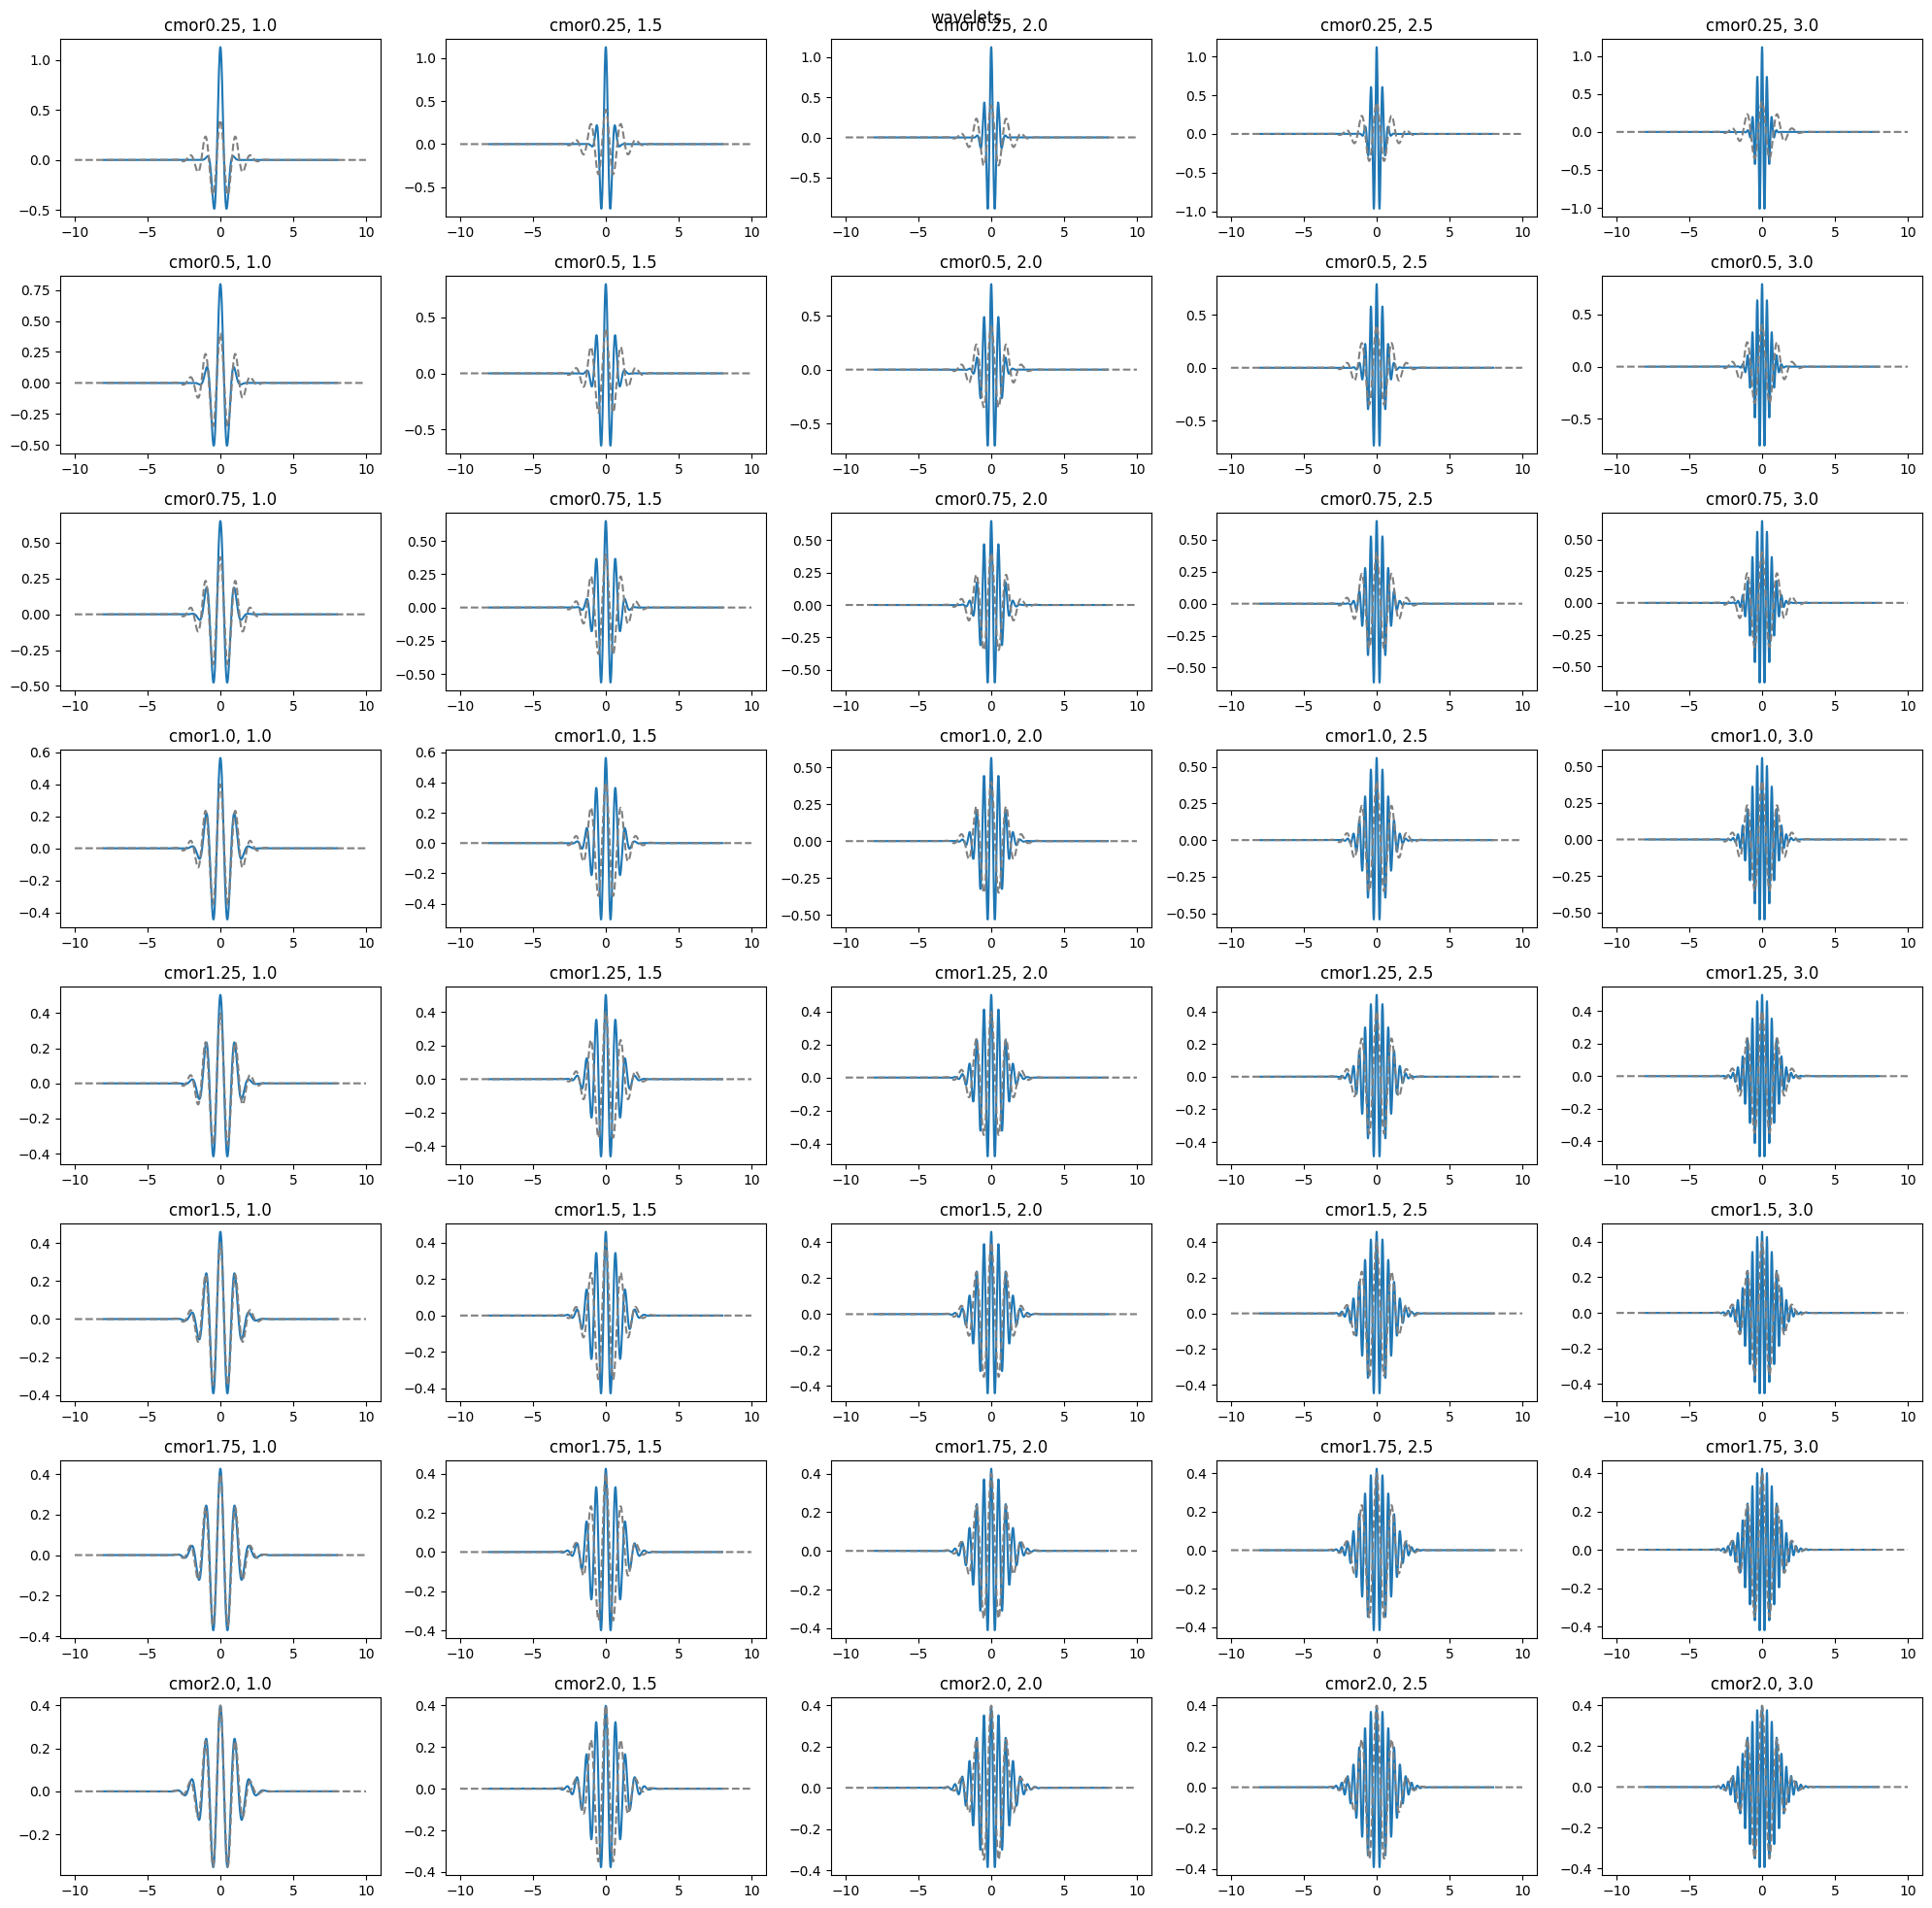

In [10]:
all_bandwidth_freqs = [
    np.array([2]),
    np.linspace(0.25, 2, 8),
]
all_center_freqs = [
    np.array([1]),
    np.linspace(1, 3, 5)
]

for bandwidth_freqs, center_freqs in zip(all_bandwidth_freqs, all_center_freqs):
    fig, axes = plt.subplots(len(bandwidth_freqs), len(center_freqs), figsize=(20, 20))
    axes = np.atleast_2d(axes)
    fig.suptitle('wavelets')
    fig.tight_layout()

    for i, bandwidth_freq in enumerate(bandwidth_freqs):
        for j, center_freq in enumerate(center_freqs):
            name = f'cmor{bandwidth_freq}, {center_freq}'
            wavelet = pywt.ContinuousWavelet(name)
            psi, x = wavelet.wavefun(10)
            axes[i,j].plot(x, np.real(psi))
            #axes[i,j].plot(x, np.imag(psi))
            #axes[i,j].plot(x, np.abs(psi))
            axes[i,j].title.set_text(name)
            dt = x[1] - x[0]
            
            #print(f'wavelet integration (pywt) : {np.sum(np.abs(psi)*dt)}')
            do_compare_with_pycwt = True
            do_normalize_pycwt = True
            if do_compare_with_pycwt:
                x_pycwt = np.linspace(-10, 10, 1000)
                # """Morlet wavelet as described in Torrence and Compo (1998)."""
                #  (np.pi ** -0.25) * np.exp(1j * self.f0 * t - t ** 2 / 2)
                psi_pycwt = pycwt.wavelet.Morlet().psi(x_pycwt)

                if do_normalize_pycwt:
                    psi_pycwt *= pow(np.pi, -0.552) # normalize for comparison. This value is found ny trial and error

                axes[i,j].plot(x_pycwt, np.real(psi_pycwt), linestyle='dashed', color='gray')
                #axes[i,j].plot(x_pycwt, np.imag(psi_pycwt), linestyle='dotted', color='gray')
                #axes[i,j].plot(x_pycwt, np.imag(psi_pycwt), linestyle='solid', color='gray')
                dt = x_pycwt[1] - x_pycwt[0]
                #print(f'wavelet integration (pycwt): {np.sum(np.abs(psi_pycwt)*dt)}')
            
plt.tight_layout()
plt.show()

best_wavelet_name = 'cmor2, 1'
